<a href="https://colab.research.google.com/github/ArchisKulkarni002/RansomwareMLProject/blob/main/Ransomware_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import warnings
from IPython.display import display, HTML
import ipaddress

# Suppress all warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_seq_items', None)
pd.set_option('display.expand_frame_repr', False)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/MyDrive/Android_Ransomeware.csv'
ransomware_df = pd.read_csv(data_path)

#EDA and PreProcessing

In [31]:
#defining color palettes
ransomware_palette = sn.color_palette("Set1", 11)

In [9]:
ransomware_df.columns = ransomware_df.columns.str.strip()

In [13]:
print(ransomware_df.head(5))

   Index                                 Flow ID    Source IP  Source Port  Destination IP  Destination Port  Protocol         Timestamp  Flow Duration  Total Fwd Packets  Total Backward Packets  Total Length of Fwd Packets  Total Length of Bwd Packets  Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  Bwd Packet Length Std   Flow Bytes/s  Flow Packets/s  Flow IAT Mean  Flow IAT Std  Flow IAT Max  Flow IAT Min  Fwd IAT Total  Fwd IAT Mean  Fwd IAT Std  Fwd IAT Max  Fwd IAT Min  Bwd IAT Total  Bwd IAT Mean  Bwd IAT Std  Bwd IAT Max  Bwd IAT Min  Fwd PSH Flags  Bwd PSH Flags  Fwd URG Flags  Bwd URG Flags  Fwd Header Length  Bwd Header Length  Fwd Packets/s  Bwd Packets/s  Min Packet Length  Max Packet Length  Packet Length Mean  Packet Length Std  Packet Length Variance  FIN Flag Count  SYN Flag Count  RST Flag Count  PSH Flag Count  ACK Flag Count  URG Flag Count  CWE Flag Co

In [14]:
#printing shape of ransomware df
df_row_count, df_column_count = ransomware_df.shape
print("rows = ", df_row_count, " cols = ", df_column_count)

rows =  392034  cols =  86


In [15]:
def summarize_dataframe(df):
    # Initialize an empty list to store summary data for each column
    summary_data = []

    # Loop through each column to get dtype, null count, distinct count, and additional statistics
    for col in df.columns:
        dtype = df[col].dtype
        null_count = df[col].isnull().sum()
        distinct_count = df[col].nunique()

        # Dictionary to store summary data for this column
        col_summary = {
            'Column': col.strip(),
            'Data Type': dtype,
            'Total Count': df_row_count,
            'Total Distinct': distinct_count,
            'Null Count': null_count

        }

        # Calculate stats based on data type
        if pd.api.types.is_numeric_dtype(df[col]):
            col_summary['Mean'] = df[col].mean()
            col_summary['Median'] = df[col].median()
            col_summary['Max'] = df[col].max()
            col_summary['Min'] = df[col].min()
            col_summary['Std_Dev'] = df[col].std()
        elif pd.api.types.is_object_dtype(df[col]):
            col_summary['Mode'] = df[col].mode().iloc[0] if not df[col].mode().empty else None
        else:
            col_summary['Mean'] = col_summary['Median'] = col_summary['Max'] = col_summary['Min'] = col_summary['Std_Dev'] = None
            col_summary['Mode'] = None

        # Append the column summary to the list
        summary_data.append(col_summary)

    return summary_data





In [16]:
summary_df = pd.DataFrame(summarize_dataframe(ransomware_df))

display(HTML(summary_df.to_html(max_rows=100, max_cols=None)))

,Column,Data Type,Total Count,Total Distinct,Null Count,Mean,Median,Max,Min,Std_Dev,Mode
0,Index,int64,392034,8699,0,1.872127e+03,1637.000000,8.698000e+03,0.000000e+00,1.441683e+03,NaN
1,Flow ID,object,392034,203556,0,NaN,NaN,NaN,NaN,NaN,8.0.6.4-8.6.0.1-0-0-0
2,Source IP,object,392034,2504,0,NaN,NaN,NaN,NaN,NaN,10.42.0.211
3,Source Port,int64,392034,52913,0,3.870163e+04,43469.000000,6.553400e+04,0.000000e+00,1.860661e+04,NaN
4,Destination IP,object,392034,5056,0,NaN,NaN,NaN,NaN,NaN,10.42.0.1
5,Destination Port,int64,392034,21942,0,5.941135e+03,443.000000,6.548700e+04,0.000000e+00,1.531961e+04,NaN
6,Protocol,int64,392034,3,0,8.373332e+00,6.000000,1.700000e+01,0.000000e+00,4.602725e+00,NaN
7,Timestamp,object,392034,4321,0,NaN,NaN,NaN,NaN,NaN,28-08-2017 12:10
8,Flow Duration,int64,392034,298031,0,1.067684e+07,515256.000000,1.199997e+08,1.000000e+00,2.197262e+07,NaN
9,Total Fwd Packets,int64,392034,605,0,7.078121e+00,2.000000,3.632000e+03,1.000000e+00,3.343450e+01,NaN


In [24]:
#Dropping the index columns
processed_ransomware_df = ransomware_df.drop(['Index', 'Flow ID' ], axis=1, inplace=False)

In [25]:
#columnns with only single value
single_valued_cols = summary_df.loc[summary_df['Total Distinct'] == 1, 'Column'].tolist()
print(single_valued_cols)

#Dropping the single valued columns
processed_ransomware_df = processed_ransomware_df.drop(single_valued_cols, axis=1, inplace=False)
summary_df = pd.DataFrame(summarize_dataframe(processed_ransomware_df))

display(HTML(summary_df.to_html(max_rows=100, max_cols=None)))

[]


,Column,Data Type,Total Count,Total Distinct,Null Count,Mode,Mean,Median,Max,Min,Std_Dev
0,Source IP,object,392034,2504,0,10.42.0.211,NaN,NaN,NaN,NaN,NaN
1,Source Port,int64,392034,52913,0,NaN,3.870163e+04,43469.000000,6.553400e+04,0.000000e+00,1.860661e+04
2,Destination IP,object,392034,5056,0,10.42.0.1,NaN,NaN,NaN,NaN,NaN
3,Destination Port,int64,392034,21942,0,NaN,5.941135e+03,443.000000,6.548700e+04,0.000000e+00,1.531961e+04
4,Protocol,int64,392034,3,0,NaN,8.373332e+00,6.000000,1.700000e+01,0.000000e+00,4.602725e+00
5,Timestamp,object,392034,4321,0,28-08-2017 12:10,NaN,NaN,NaN,NaN,NaN
6,Flow Duration,int64,392034,298031,0,NaN,1.067684e+07,515256.000000,1.199997e+08,1.000000e+00,2.197262e+07
7,Total Fwd Packets,int64,392034,605,0,NaN,7.078121e+00,2.000000,3.632000e+03,1.000000e+00,3.343450e+01
8,Total Backward Packets,int64,392034,943,0,NaN,8.711813e+00,1.000000,1.282000e+04,0.000000e+00,8.094987e+01
9,Total Length of Fwd Packets,int64,392034,10711,0,NaN,8.844412e+02,31.000000,4.309688e+06,0.000000e+00,1.662189e+04


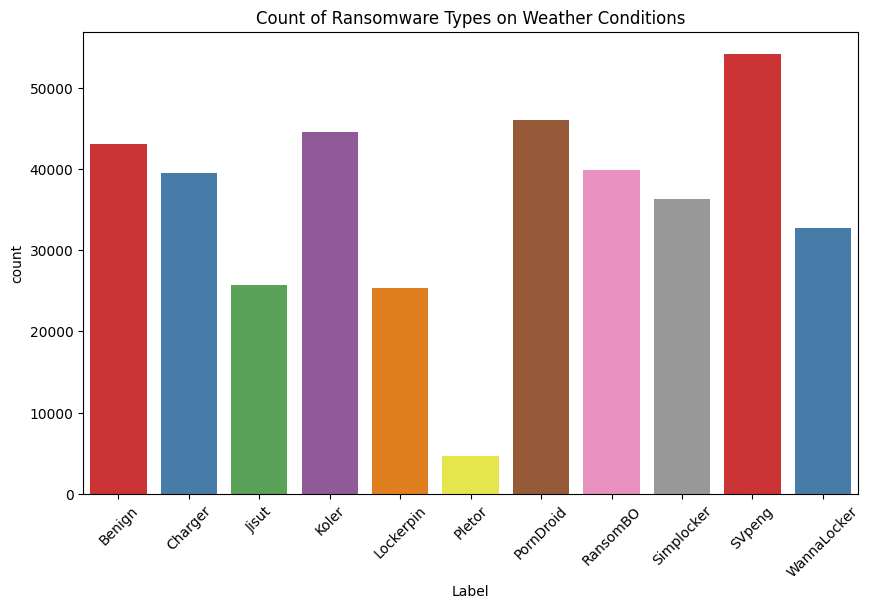

In [37]:
plt.figure(figsize=(10, 6))
sn.countplot(data=processed_ransomware_df, x='Label', palette=ransomware_palette)
plt.title('Count of Ransomware Types on Weather Conditions')
plt.xticks(rotation=45)
plt.show()

In [29]:
def is_private_ip(ip):
    try:
      ip_obj = ipaddress.ip_address(ip)

      if ip_obj.is_private:
          return 'private'
      elif ip_obj.is_loopback:
          return 'loopback'
      elif ip_obj.is_link_local:
          return 'link_local'
      elif ip_obj.is_multicast:
          return 'multicast'
      else:
          return 'public'
    except ValueError:
        return None

processed_ransomware_df['Source_IP_type'] = processed_ransomware_df['Source IP'].apply(is_private_ip)
processed_ransomware_df['Destination_IP_type'] = processed_ransomware_df['Destination IP'].apply(is_private_ip)

summary_df = pd.DataFrame(summarize_dataframe(processed_ransomware_df[['Source_IP_type', 'Destination_IP_type']]))
display(HTML(summary_df.to_html(max_rows=100, max_cols=None)))

,Column,Data Type,Total Count,Total Distinct,Null Count,Mode
0,Source_IP_type,object,392034,2,0,private
1,Destination_IP_type,object,392034,3,0,public
